In [ ]:
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Data Analysis

In [ ]:
df = pd.read_csv('predictive_maintenance.csv')
df

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/15,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,1/1/15,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/15,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/15,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/15,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
124489,11/2/15,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,11/2/15,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,11/2/15,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,11/2/15,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0


In [ ]:
df1 = df.drop(['date', 'device'], axis = 1)
df1.corr()

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
failure,1.000000,0.001983,0.052902,-0.000948,0.067398,0.002270,-0.000550,0.119055,0.119055,0.001622
metric1,0.001983,1.000000,-0.004250,0.003701,0.001836,-0.003376,-0.001522,0.000151,0.000151,0.001121
metric2,0.052902,-0.004250,1.000000,-0.002617,0.146593,-0.013999,-0.026350,0.141367,0.141367,-0.002736
metric3,-0.000948,0.003701,-0.002617,1.000000,0.097452,-0.006696,0.009027,-0.001884,-0.001884,0.532366
metric4,0.067398,0.001836,0.146593,0.097452,1.000000,-0.009773,0.024870,0.045631,0.045631,0.036069
metric5,0.002270,-0.003376,-0.013999,-0.006696,-0.009773,1.000000,-0.017049,-0.009384,-0.009384,0.005949
metric6,-0.000550,-0.001522,-0.026350,0.009027,0.024870,-0.017049,1.000000,-0.012207,-0.012207,0.021152
metric7,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861
metric8,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861
metric9,0.001622,0.001121,-0.002736,0.532366,0.036069,0.005949,0.021152,0.006861,0.006861,1.000000


In [ ]:
# profile = ProfileReport(df)
# # profile.config.plot.wordcloud = False
# profile.to_file(output_file="pm.html")

In [ ]:
df.isnull().sum()

date       0
device     0
failure    0
metric1    0
metric2    0
metric3    0
metric4    0
metric5    0
metric6    0
metric7    0
metric8    0
metric9    0
dtype: int64

In [ ]:
#The dataset is highly imbalanced

In [ ]:
df.failure.value_counts()

failure
0    124388
1       106
Name: count, dtype: int64

In [ ]:
df.duplicated().sum()

1

In [ ]:
len(df.device.unique())

1169

In [ ]:
(len(df[df.failure==1].device.unique()))

106

In [ ]:
df.nunique()

date          304
device       1169
failure         2
metric1    123877
metric2       558
metric3        47
metric4       115
metric5        60
metric6     44838
metric7        28
metric8        28
metric9        65
dtype: int64

In [ ]:
df.date = pd.to_datetime(df.date)

df['No_of_days_the_device_has_been_active']=df.date-df.date[0]

df['month']=df['date'].dt.month
df['week_day']=df.date.dt.weekday
df['week_day'].replace(0,7,inplace=True)
# df = df.drop('No. of days the device has been active', axis=1)

df

/tmp/ipykernel_78262/972920065.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.date = pd.to_datetime(df.date)


,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,No_of_days_the_device_has_been_active,month,week_day
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7,0 days,1,3
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0,0 days,1,3
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0,0 days,1,3
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0,0 days,1,3
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3,0 days,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0,305 days,11,7
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13,305 days,11,7
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0,305 days,11,7
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0,305 days,11,7


In [ ]:

unique_devices_per_month = df.groupby('month')['device'].nunique()


In [ ]:
print(unique_devices_per_month)

month
1     1164
2      726
3      685
4      491
5      424
6      353
7      346
8      334
9      184
10     146
11      31
Name: device, dtype: int64


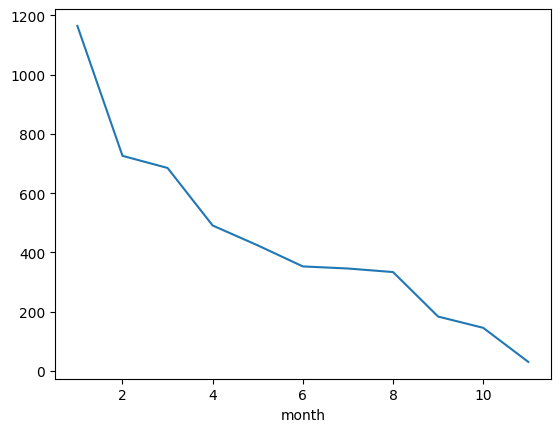

In [ ]:
unique_devices_per_month.plot()
plt.show()

In [ ]:
monday_failures = df[(df['week_day'] == 1) & (df['failure'] == 1)]

In [ ]:
print(monday_failures.failure.value_counts())

failure
1    18
Name: count, dtype: int64


In [ ]:
tuesday_failures = df[(df['week_day'] == 2) & (df['failure'] == 1)]
print(tuesday_failures.failure.value_counts())

failure
1    15
Name: count, dtype: int64


In [ ]:
wednesday_failures = df[(df['week_day'] == 3) & (df['failure'] == 1)]
print(wednesday_failures.failure.value_counts())

failure
1    22
Name: count, dtype: int64


In [ ]:
thursday_failures = df[(df['week_day'] == 4) & (df['failure'] == 1)]
print(thursday_failures.failure.value_counts())

failure
1    12
Name: count, dtype: int64


In [ ]:
friday_failures = df[(df['week_day'] == 5) & (df['failure'] == 1)]
print(friday_failures.failure.value_counts())

failure
1    8
Name: count, dtype: int64


In [ ]:
saturday_failures = df[(df['week_day'] == 6) & (df['failure'] == 1)]
print(saturday_failures.failure.value_counts())

failure
1    4
Name: count, dtype: int64


In [ ]:
sunday_failures = df[(df['week_day'] == 7) & (df['failure'] == 1)]
print(sunday_failures.failure.value_counts())

failure
1    27
Name: count, dtype: int64


In [ ]:
# From the above it can be seen that most of the devices failed on sunday and less on the saturday

/home/nabeel/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nabeel/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nabeel/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


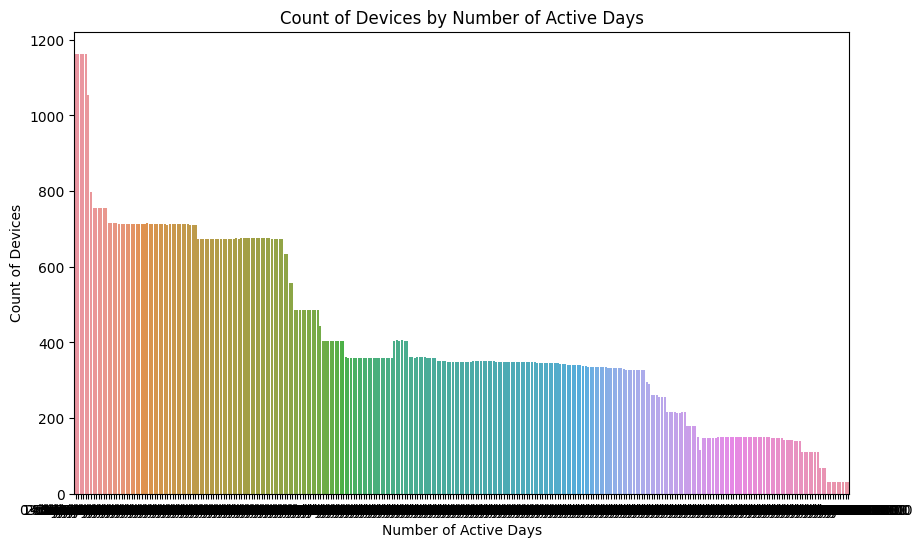

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='No_of_days_the_device_has_been_active', data=df)
plt.xlabel('Number of Active Days')
plt.ylabel('Count of Devices')
plt.title('Count of Devices by Number of Active Days')
plt.show()


In [ ]:
df.No_of_days_the_device_has_been_active.max()

Timedelta('305 days 00:00:00')

In [ ]:
#From the above plot we can see that there is some introduction of the repaired devices since the count is going up

In [ ]:
df.date.max()

Timestamp('2015-11-02 00:00:00')

In [ ]:
df.date.min()

Timestamp('2015-01-01 00:00:00')

In [ ]:
#Here we can see the samples were collected between January 1,2015 and November 2,2015

In [ ]:
device_name = 'S1F01085'

# Filter the DataFrame based on the device name
device_data = df[df['device'] == device_name]
print(device_data)

           date    device  failure    metric1  metric2  metric3  metric4  \
0    2015-01-01  S1F01085        0  215630672       56        0       52   
1163 2015-01-02  S1F01085        0    1650864       56        0       52   
2326 2015-01-03  S1F01085        0  124017368       56        0       52   
3489 2015-01-04  S1F01085        0  128073224       56        0       52   
4651 2015-01-05  S1F01085        0   97393448       56        0       52   
5812 2015-01-06  S1F01085        0  128832128       56        0       52   

      metric5  metric6  metric7  metric8  metric9  \
0           6   407438        0        0        7   
1163        6   407438        0        0        7   
2326        6   407438        0        0        7   
3489        6   407439        0        0        7   
4651        6   408114        0        0        7   
5812        6   409404        0        0        7   

     No_of_days_the_device_has_been_active  month  week_day  
0                                

In [ ]:
df_date = df.groupby('device').agg({'date':max})

df_date.date.to_dict()

df_failure = df.loc[df.failure==1,['device','date']]

df_good = df.loc[df.failure==0,['device','date']]

df_date.shape,df_failure.shape

df['max_date']=df.device.map(df_date.date.to_dict())

#df

/tmp/ipykernel_78262/362513023.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df_date = df.groupby('device').agg({'date':max})


In [ ]:
dff=df[(df.failure==1)&(df.date!=df.max_date)]


dff



,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,No_of_days_the_device_has_been_active,month,week_day,max_date
77958,2015-05-05,S1F136J0,1,131519808,0,0,25,16,343464,8,8,0,124 days,5,1,2015-05-06
79590,2015-05-09,W1F0KCP2,1,176861128,10392,0,121,6,310699,0,0,0,128 days,5,5,2015-05-11
79601,2015-05-09,W1F0M35B,1,141805096,0,0,1,7,267203,0,0,0,128 days,5,5,2015-05-11
101999,2015-07-12,S1F0GPFZ,1,236544080,0,0,0,9,264594,0,0,0,192 days,7,6,2015-07-24
104223,2015-07-18,W1F11ZG9,1,32671632,368,9,486,3,344433,0,0,1,198 days,7,5,2015-08-17


In [ ]:
print(dff.device.value_counts())

device
S1F136J0    1
W1F0KCP2    1
W1F0M35B    1
S1F0GPFZ    1
W1F11ZG9    1
Name: count, dtype: int64


In [ ]:
df.metric1.nunique()

123877

In [ ]:
df1 = df.groupby('device').agg({'date':max})

/tmp/ipykernel_78262/1774015242.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df1 = df.groupby('device').agg({'date':max})


In [ ]:
df[df['device']== 'S1F136J0']

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,No_of_days_the_device_has_been_active,month,week_day,max_date
500,2015-01-01,S1F136J0,0,229928576,0,0,25,16,312312,0,0,0,0 days,1,3,2015-05-06
1663,2015-01-02,S1F136J0,0,6051808,0,0,25,16,313710,0,0,0,1 days,1,4,2015-05-06
2826,2015-01-03,S1F136J0,0,29281832,0,0,25,16,315035,0,0,0,2 days,1,5,2015-05-06
3989,2015-01-04,S1F136J0,0,54942936,0,0,25,16,316364,0,0,0,3 days,1,6,2015-05-06
5150,2015-01-05,S1F136J0,0,73810232,0,0,25,16,317707,0,0,0,4 days,1,7,2015-05-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76881,2015-05-02,S1F136J0,0,55535800,0,0,25,16,340161,8,8,0,121 days,5,5,2015-05-06
77240,2015-05-03,S1F136J0,0,72745992,0,0,25,16,341416,8,8,0,122 days,5,6,2015-05-06
77599,2015-05-04,S1F136J0,0,81808304,0,0,25,16,342707,8,8,0,123 days,5,7,2015-05-06
77958,2015-05-05,S1F136J0,1,131519808,0,0,25,16,343464,8,8,0,124 days,5,1,2015-05-06


In [ ]:
df1=df1.reset_index()

df=df.reset_index(drop=True)

df2= pd.merge(df1,df,how='left',on=['device','date'])

df2.shape

(1169, 16)

In [ ]:
df2

,device,date,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,No_of_days_the_device_has_been_active,month,week_day,max_date
0,S1F01085,2015-01-06,0,128832128,56,0,52,6,409404,0,0,7,5 days,1,1,2015-01-06
1,S1F013BB,2015-05-11,0,115676688,0,0,0,5,689161,0,0,0,130 days,5,7,2015-05-11
2,S1F0166B,2015-01-06,0,7441792,0,3,0,6,404786,0,0,0,5 days,1,1,2015-01-06
3,S1F01E6Y,2015-02-17,0,147350000,0,0,0,12,259491,0,0,0,47 days,2,1,2015-02-17
4,S1F01JE0,2015-01-06,0,185424928,0,0,0,6,412151,0,0,0,5 days,1,1,2015-01-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164,Z1F1VMZB,2015-10-19,0,96949360,0,0,0,5,263507,0,0,0,291 days,10,7,2015-10-19
1165,Z1F1VQFY,2015-06-30,1,178051496,0,0,0,7,265316,0,0,0,180 days,6,1,2015-06-30
1166,Z1F26YZB,2015-03-25,0,229065488,0,1,0,1,292052,0,0,0,83 days,3,2,2015-03-25
1167,Z1F282ZV,2015-03-25,0,72717600,0,1,0,1,192919,0,0,0,83 days,3,2,2015-03-25


In [ ]:
df2['failure_before']=0
 # devices features

df2['sector'] = df2['device'].str[:4]
df2['equipment'] = df2['device'].str[4:]



In [ ]:
df2.head()

,device,date,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,No_of_days_the_device_has_been_active,month,week_day,max_date,failure_before,sector,equipment
0,S1F01085,2015-01-06,0,128832128,56,0,52,6,409404,0,0,7,5 days,1,1,2015-01-06,0,S1F0,1085
1,S1F013BB,2015-05-11,0,115676688,0,0,0,5,689161,0,0,0,130 days,5,7,2015-05-11,0,S1F0,13BB
2,S1F0166B,2015-01-06,0,7441792,0,3,0,6,404786,0,0,0,5 days,1,1,2015-01-06,0,S1F0,166B
3,S1F01E6Y,2015-02-17,0,147350000,0,0,0,12,259491,0,0,0,47 days,2,1,2015-02-17,0,S1F0,1E6Y
4,S1F01JE0,2015-01-06,0,185424928,0,0,0,6,412151,0,0,0,5 days,1,1,2015-01-06,0,S1F0,1JE0


In [ ]:
# Now assinging the failure_before value to all those 5 devices that failed and then were introduced after repair
# Those devices were:
                     # S1F136J0    1
                     # W1F0KCP2    1
                     # W1F0M35B    1
                     # S1F0GPFZ    1
                     # W1F11ZG9    1

In [ ]:
devices_to_flag = ['S1F136J0', 'W1F0KCP2', 'W1F0M35B', 'S1F0GPFZ', 'W1F11ZG9']
for device in devices_to_flag:
    df2.loc[df2.device == device,'failure_before'] = 1



In [ ]:
df2[df2['device']=='W1F0KCP2']

,device,date,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,No_of_days_the_device_has_been_active,month,week_day,max_date,failure_before,sector,equipment
599,W1F0KCP2,2015-05-11,0,140419256,10440,0,121,6,310801,0,0,0,130 days,5,7,2015-05-11,1,W1F0,KCP2


In [ ]:
df2.device


0       S1F01085
1       S1F013BB
2       S1F0166B
3       S1F01E6Y
4       S1F01JE0
          ...   
1164    Z1F1VMZB
1165    Z1F1VQFY
1166    Z1F26YZB
1167    Z1F282ZV
1168    Z1F2PBHX
Name: device, Length: 1169, dtype: object

In [ ]:
#Now analyzing the type of device based on the first four characters of the device name
ID = df2.device.values.tolist()

ID_real=[]

for i in ID:

    i=i[:4]
    ID_real.append(i)

df2.device=ID_real

df2.device.value_counts()



device
S1F0    391
W1F0    282
Z1F0    149
S1F1    139
W1F1    138
Z1F1     67
Z1F2      3
Name: count, dtype: int64

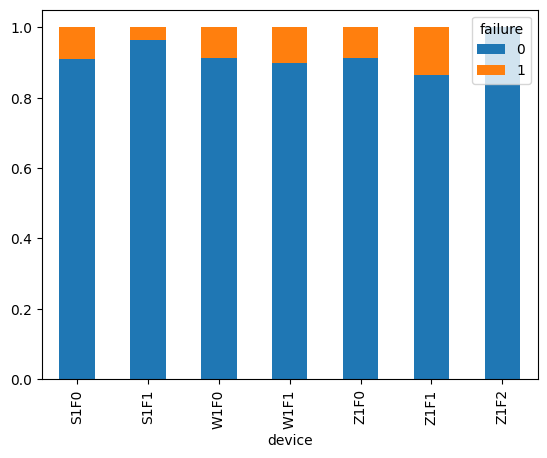

In [ ]:
# Grouping and normalizing
normalized_dev = df2.groupby('device')['failure'].value_counts(normalize=True).unstack()

# Plotting
normalized_dev.plot(kind='bar', stacked=True)
plt.show()

In [ ]:
# From the above graph it can be seen that the devices which fail the least starts with "Z1F2" and which fails the most with "Z1F1"


In [ ]:
df


,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,No_of_days_the_device_has_been_active,month,week_day,max_date
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7,0 days,1,3,2015-01-06
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0,0 days,1,3,2015-01-06
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0,0 days,1,3,2015-02-17
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0,0 days,1,3,2015-01-06
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3,0 days,1,3,2015-08-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0,305 days,11,7,2015-11-02
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13,305 days,11,7,2015-11-02
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0,305 days,11,7,2015-11-02
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0,305 days,11,7,2015-11-02


In [ ]:
df2.nunique()

device                                      7
date                                      104
failure                                     2
metric1                                  1168
metric2                                   118
metric3                                    44
metric4                                    67
metric5                                    58
metric6                                  1135
metric7                                    22
metric8                                    22
metric9                                    63
No_of_days_the_device_has_been_active     104
month                                      11
week_day                                    7
max_date                                  104
failure_before                              2
sector                                      7
equipment                                1169
dtype: int64

In [ ]:
cat_ftrs = ['metric3','metric4', 'metric5', 'metric7', 'metric9']
for col in cat_ftrs:
    df2[col]=df2[col].astype('object')

In [ ]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169 entries, 0 to 1168
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype          
---  ------                                 --------------  -----          
 0   device                                 1169 non-null   object         
 1   date                                   1169 non-null   datetime64[ns] 
 2   failure                                1169 non-null   int64          
 3   metric1                                1169 non-null   int64          
 4   metric2                                1169 non-null   int64          
 5   metric3                                1169 non-null   object         
 6   metric4                                1169 non-null   object         
 7   metric5                                1169 non-null   object         
 8   metric6                                1169 non-null   int64          
 9   metric7                                1169 non-null

In [ ]:
def str_to_num(str):
    return str.split(' ')[0]

df2.No_of_days_the_device_has_been_active = df2.No_of_days_the_device_has_been_active.astype('str')

df2.No_of_days_the_device_has_been_active=df2.No_of_days_the_device_has_been_active.apply(str_to_num)
df2.No_of_days_the_device_has_been_active = df2.No_of_days_the_device_has_been_active.astype('int')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169 entries, 0 to 1168
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   device                                 1169 non-null   object        
 1   date                                   1169 non-null   datetime64[ns]
 2   failure                                1169 non-null   int64         
 3   metric1                                1169 non-null   int64         
 4   metric2                                1169 non-null   int64         
 5   metric3                                1169 non-null   object        
 6   metric4                                1169 non-null   object        
 7   metric5                                1169 non-null   object        
 8   metric6                                1169 non-null   int64         
 9   metric7                                1169 non-null   object  

In [ ]:
for col in ['month','week_day']:
    df2[col]=df2[col].astype('object')

df2['metric4']=df2['metric4'].astype('int64')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169 entries, 0 to 1168
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   device                                 1169 non-null   object        
 1   date                                   1169 non-null   datetime64[ns]
 2   failure                                1169 non-null   int64         
 3   metric1                                1169 non-null   int64         
 4   metric2                                1169 non-null   int64         
 5   metric3                                1169 non-null   object        
 6   metric4                                1169 non-null   int64         
 7   metric5                                1169 non-null   object        
 8   metric6                                1169 non-null   int64         
 9   metric7                                1169 non-null   object  

/home/nabeel/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nabeel/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/nabeel/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nabeel/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

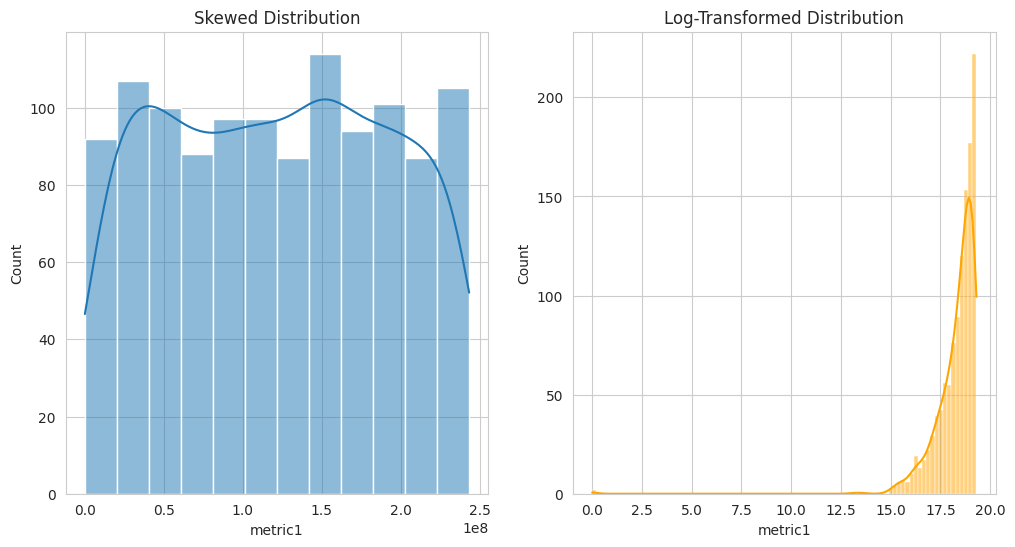

In [ ]:

# Set the style to a different one
sns.set_style("whitegrid")

f, axarr = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df2['metric1'], ax=axarr[0], kde=True)
axarr[0].set_title('Skewed Distribution')
sns.histplot(np.log(1+df2['metric1']), ax=axarr[1], kde=True,color='orange')
axarr[1].set_title('Log-Transformed Distribution')

plt.show()


/home/nabeel/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nabeel/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/nabeel/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nabeel/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

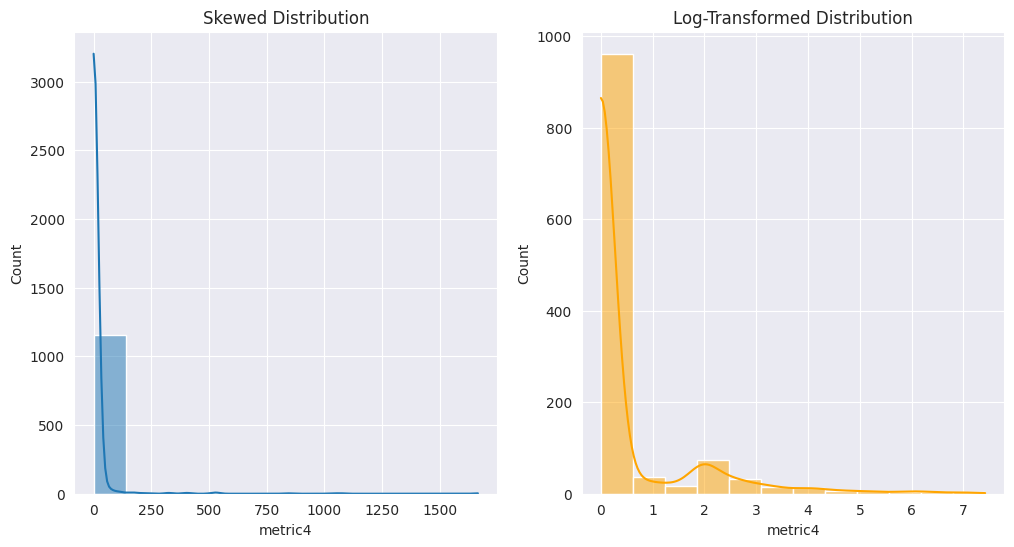

In [ ]:



sns.set_style("darkgrid")

f, axarr = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df2['metric4'], ax=axarr[0], kde=True)
axarr[0].set_title('Skewed Distribution')
sns.histplot(np.log(1+df2['metric4']), ax=axarr[1], kde=True,color='orange')
axarr[1].set_title('Log-Transformed Distribution')

plt.show()






/tmp/ipykernel_78262/71232362.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['metric2'],ax=axarr[0])
/home/nabeel/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nabeel/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp

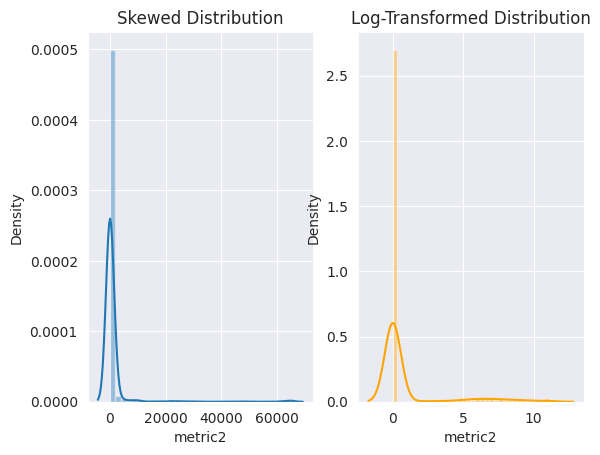

In [ ]:

f, axarr = plt.subplots(1,2)
sns.distplot(df2['metric2'],ax=axarr[0])
axarr[0].set_title('Skewed Distribution')
sns.distplot(np.log(1+df2['metric2']),ax=axarr[1],color='orange')
axarr[1].set_title('Log-Transformed Distribution')
plt.show()

/home/nabeel/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nabeel/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/nabeel/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nabeel/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

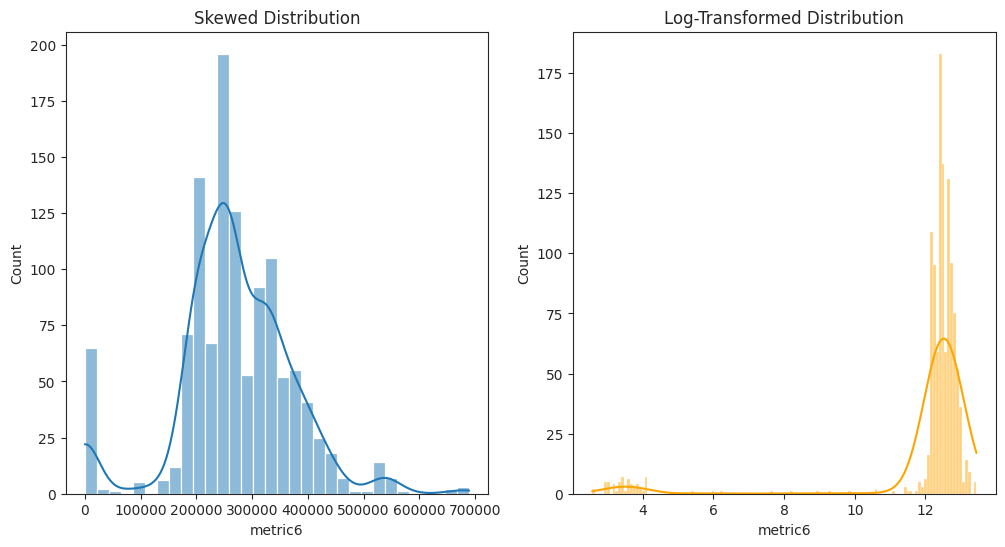

In [ ]:

sns.set_style("ticks")

f, axarr = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df2['metric6'], ax=axarr[0], kde=True)
axarr[0].set_title('Skewed Distribution')
sns.histplot(np.log(1+df2['metric6']), ax=axarr[1], kde=True,color='orange')
axarr[1].set_title('Log-Transformed Distribution')

plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

num_ftrs =['metric1','metric2','metric4','metric6']
df2[num_ftrs]=scaler.fit_transform(df2[num_ftrs])

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169 entries, 0 to 1168
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   device                                 1169 non-null   object        
 1   date                                   1169 non-null   datetime64[ns]
 2   failure                                1169 non-null   int64         
 3   metric1                                1169 non-null   float64       
 4   metric2                                1169 non-null   float64       
 5   metric3                                1169 non-null   object        
 6   metric4                                1169 non-null   float64       
 7   metric5                                1169 non-null   object        
 8   metric6                                1169 non-null   float64       
 9   metric7                                1169 non-null   object  

/home/nabeel/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nabeel/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/nabeel/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/nabeel/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nabeel/.local/lib

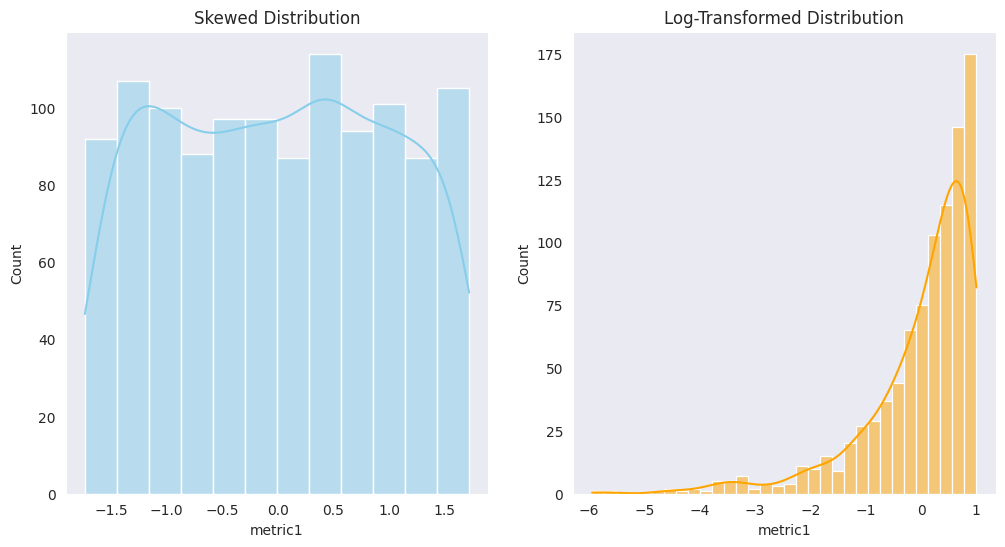

In [ ]:
sns.set_style("dark")

f, axarr = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df2['metric1'], ax=axarr[0], kde=True, color='skyblue')
axarr[0].set_title('Skewed Distribution')
sns.histplot(np.log(1+df2['metric1']), ax=axarr[1], kde=True, color='orange')
axarr[1].set_title('Log-Transformed Distribution')

plt.show()

In [ ]:
#df.drop(['metric3','metric5','metric6','metric8'],axis=1,inplace=True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169 entries, 0 to 1168
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   device                                 1169 non-null   object        
 1   date                                   1169 non-null   datetime64[ns]
 2   failure                                1169 non-null   int64         
 3   metric1                                1169 non-null   float64       
 4   metric2                                1169 non-null   float64       
 5   metric3                                1169 non-null   object        
 6   metric4                                1169 non-null   float64       
 7   metric5                                1169 non-null   object        
 8   metric6                                1169 non-null   float64       
 9   metric7                                1169 non-null   object  

In [ ]:
df2.drop(['date','max_date','device'],axis=1,inplace=True)
df2[df2['failure']==0].value_counts()
df2.head()

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,No_of_days_the_device_has_been_active,month,week_day,failure_before,sector,equipment
0,0,0.094795,-0.136309,0,0.534665,6,1.333502,0,0,7,5,1,1,0,S1F0,1085
1,0,-0.092146,-0.145660,0,-0.124295,5,4.008798,0,0,0,130,5,7,0,S1F0,13BB
2,0,-1.630184,-0.145660,3,-0.124295,6,1.289341,0,0,0,5,1,1,0,S1F0,166B
3,0,0.357937,-0.145660,0,-0.124295,12,-0.100105,0,0,0,47,2,1,0,S1F0,1E6Y
4,0,0.898989,-0.145660,0,-0.124295,6,1.359772,0,0,0,5,1,1,0,S1F0,1JE0


In [ ]:
# print(df2[df2['failure'] == 0 & (df2['failure_before']==0)].shape

In [ ]:
df2.head()
df2.shape
#df2.drop(['metric1','metric7','metric5'],axis=1,inplace=True)
df2.drop(['metric3','metric5','metric8','metric9','equipment'],axis=1,inplace=True)
df2.failure_before.value_counts()
df2

# List of columns to exclude from get_dummies()
columns_to_exclude = ['metric1','failure','metric2','metric4','metric6','metric7','No_of_days_the_device_has_been_active','failure_before']

# Get dummy variables for all columns except those to exclude
df2 = pd.get_dummies(df2, drop_first=True, columns=df2.columns.difference(columns_to_exclude))

# df2 = pd.get_dummies(df2,drop_first=False)
df2.replace({True: 1, False: 0}, inplace=True)
df2['No_of_days_the_device_has_been_active']=(df2.No_of_days_the_device_has_been_active)/305
df2.head()
# df2 = pd.get_dummies(df2, columns=['sector'])
# df2 = pd.get_dummies(df2, columns=['equipment'])


,failure,metric1,metric2,metric4,metric6,metric7,No_of_days_the_device_has_been_active,failure_before,month_2,month_3,...,sector_W1F1,sector_Z1F0,sector_Z1F1,sector_Z1F2,week_day_2,week_day_3,week_day_4,week_day_5,week_day_6,week_day_7
0,0,0.094795,-0.136309,0.534665,1.333502,0,0.016393,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,-0.092146,-0.145660,-0.124295,4.008798,0,0.426230,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,-1.630184,-0.145660,-0.124295,1.289341,0,0.016393,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.357937,-0.145660,-0.124295,-0.100105,0,0.154098,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.898989,-0.145660,-0.124295,1.359772,0,0.016393,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# df2.replace({True: 1, False: 0}, inplace=True)
df2.info('failure')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169 entries, 0 to 1168
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   failure                                1169 non-null   int64  
 1   metric1                                1169 non-null   float64
 2   metric2                                1169 non-null   float64
 3   metric4                                1169 non-null   float64
 4   metric6                                1169 non-null   float64
 5   metric7                                1169 non-null   int64  
 6   No_of_days_the_device_has_been_active  1169 non-null   float64
 7   failure_before                         1169 non-null   int64  
 8   month_2                                1169 non-null   int64  
 9   month_3                                1169 non-null   int64  
 10  month_4                                1169 non-null   int64  
 11  mont

In [ ]:
# df2.failure.value_counts()
# df2

# failure0,  failure1 = df2.failure.value_counts()
# failure0 , failure1

In [ ]:
# #Dividing by class

# class0=df2[df2['failure'] == 0]
# class1=df2[df2['failure'] == 1]
# class0.shape, class1.shape

In [ ]:
X = df2.drop('failure',axis=1)
Y = df2.failure
Y.shape

(1169,)

In [ ]:
X.shape, Y.value_counts()

((1169, 29),
 failure
 0    1068
 1     101
 Name: count, dtype: int64)

In [ ]:
# # Y
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state = 42)
X_train


,metric1,metric2,metric4,metric6,metric7,No_of_days_the_device_has_been_active,failure_before,month_2,month_3,month_4,...,sector_W1F1,sector_Z1F0,sector_Z1F1,sector_Z1F2,week_day_2,week_day_3,week_day_4,week_day_5,week_day_6,week_day_7
593,0.936289,-0.14566,-0.124295,0.481388,0,0.311475,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
788,1.268502,-0.14566,-0.124295,-2.581149,0,0.265574,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
490,-0.509442,-0.14566,-0.124295,0.524871,0,0.963934,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
654,0.999364,-0.14566,0.141824,-0.265935,8,0.252459,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
963,-0.013114,-0.14566,-0.124295,1.281557,0,0.016393,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,1.408988,-0.14566,-0.124295,-0.595187,0,0.426230,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1095,-1.037965,-0.14566,-0.124295,1.547588,0,0.344262,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
1130,-1.671598,-0.14566,-0.111622,-0.240766,0,0.429508,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
860,0.229988,-0.14566,-0.124295,-2.581311,0,0.757377,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [ ]:
from imblearn.over_sampling import SMOTE

# Create SMOTE object
# Create SMOTE object with custom sampling strategy
smote = SMOTE(sampling_strategy='auto', random_state=42)


# Apply SMOTE to resample the dataset
X_train,Y_train= smote.fit_resample(X_train, Y_train)


X_train.shape, Y_train.shape[0]



((1494, 29), 1494)

In [ ]:
print(X[:])

from sklearn.metrics import roc_auc_score



       metric1   metric2   metric4   metric6  metric7  \
0     0.094795 -0.136309  0.534665  1.333502        0   
1    -0.092146 -0.145660 -0.124295  4.008798        0   
2    -1.630184 -0.145660 -0.124295  1.289341        0   
3     0.357937 -0.145660 -0.124295 -0.100105        0   
4     0.898989 -0.145660 -0.124295  1.359772        0   
...        ...       ...       ...       ...      ...   
1164 -0.358265 -0.145660 -0.124295 -0.061700        0   
1165  0.794211 -0.145660 -0.124295 -0.044401        0   
1166  1.519129 -0.145660 -0.124295  0.211274        0   
1167 -0.702603 -0.145660 -0.124295 -0.736728        0   
1168  0.118815 -0.145660 -0.124295 -1.013087        0   

      No_of_days_the_device_has_been_active  failure_before  month_2  month_3  \
0                                  0.016393               0        0        0   
1                                  0.426230               0        0        0   
2                                  0.016393               0        0    

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, make_scorer

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(Y_test, y_pred)
print("Precision:", precision)
recall = recall_score(Y_test, y_pred)
print("Recall:", recall)
f1 = f1_score(Y_test, y_pred)
print("F1 Score:", f1)
auc_roc_score = roc_auc_score(Y_test, y_pred)
print("AUC-ROC Score:", auc_roc_score)


Accuracy: 0.9031339031339032
Precision: 0.46296296296296297
Recall: 0.8333333333333334
F1 Score: 0.5952380952380952
AUC-ROC Score: 0.8714953271028038


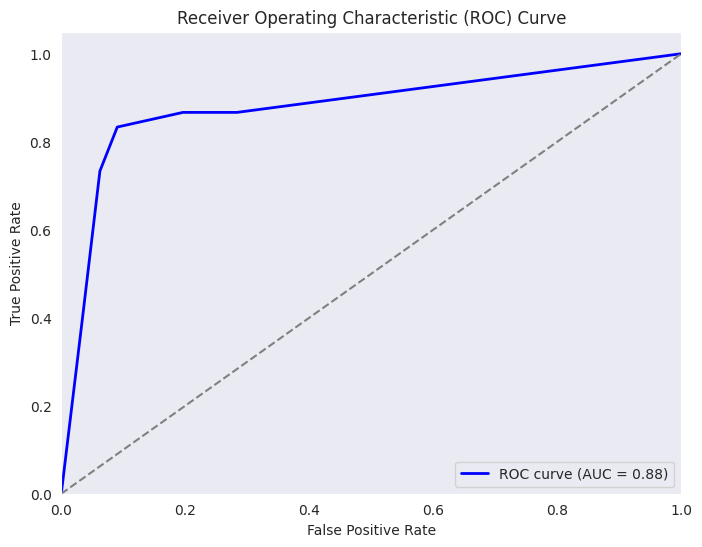

In [ ]:
y_probs = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)
auc_roc = roc_auc_score(Y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:

from sklearn import metrics
from sklearn.model_selection import GridSearchCV

knn_classifier = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7],  # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute the nearest neighbors
    'p': [1, 2]  # Power parameter for the Minkowski metric
}

scorer = make_scorer(f1_score, average='weighted')

grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, scoring=scorer, cv=5)
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (F1):", best_score)

best_knn_classifier = KNeighborsClassifier(**best_params)

best_knn_classifier.fit(X_train, Y_train)

y_pred = best_knn_classifier.predict(X_test)


precision = precision_score(Y_test, y_pred, average='weighted')
recall = recall_score(Y_test, y_pred, average='weighted')
f1 = f1_score(Y_test, y_pred, average='weighted')
auc_roc = roc_auc_score(Y_test, y_pred, average='weighted')

print("Test Precision Score:", precision)
print("Test Recall Score:", recall)
print("Test F1 Score:", f1)
print("AUC-ROC Score:", auc_roc)

# Accuracy: 0.9287749287749287 [This is the accuracy score I have got for the model sorry I forgot to print it during code my walkthrough]

Best Parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Best Score (F1): 0.9645212189009325
Test Precision Score: 0.9392943239097085
Test Recall Score: 0.9287749287749287
Test F1 Score: 0.9329137027467956
AUC-ROC Score: 0.8401869158878504


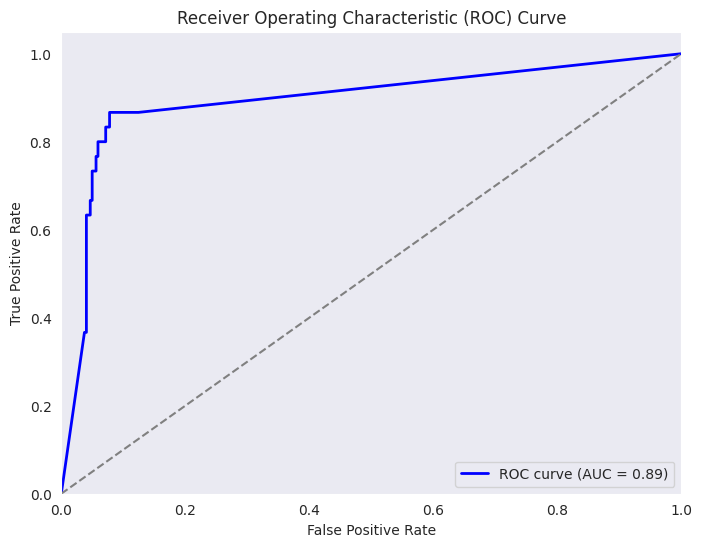

In [ ]:
y_probs = best_knn_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)
auc_roc = roc_auc_score(Y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import xgboost as xgb
from sklearn import metrics
model = xgb.XGBClassifier()

model.fit(X_train,Y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(Y_test, y_pred)
print("Precision:", precision)
recall = recall_score(Y_test, y_pred)
print("Recall:", recall)
f1 = f1_score(Y_test, y_pred)
print("F1 Score:", f1)
auc_roc_score = roc_auc_score(Y_test, y_pred)
print("AUC-ROC Score:", auc_roc_score)



Accuracy: 0.9686609686609686
Precision: 0.8275862068965517
Recall: 0.8
F1 Score: 0.8135593220338982
AUC-ROC Score: 0.8922118380062305


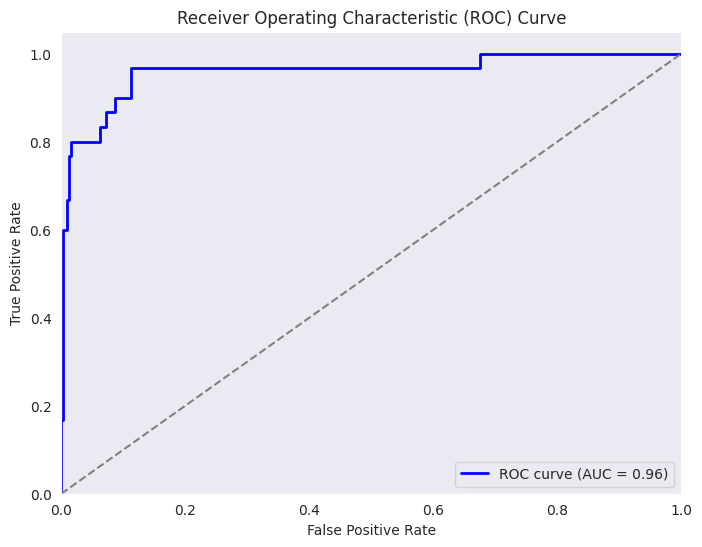

In [ ]:
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)
auc_roc = roc_auc_score(Y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

adaboost = AdaBoostClassifier(n_estimators=42, random_state=42)
adaboost.fit(X_train, Y_train)
y_pred = adaboost.predict(X_test)



In [ ]:
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(Y_test, y_pred)
print("Precision:", precision)
recall = recall_score(Y_test, y_pred)
print("Recall:", recall)
f1 = f1_score(Y_test, y_pred)
print("F1 Score:", f1)
auc_roc_score = roc_auc_score(Y_test, y_pred)
print("AUC-ROC Score:", auc_roc_score)

Accuracy: 0.9629629629629629
Precision: 0.8148148148148148
Recall: 0.7333333333333333
F1 Score: 0.7719298245614035
AUC-ROC Score: 0.8588785046728973


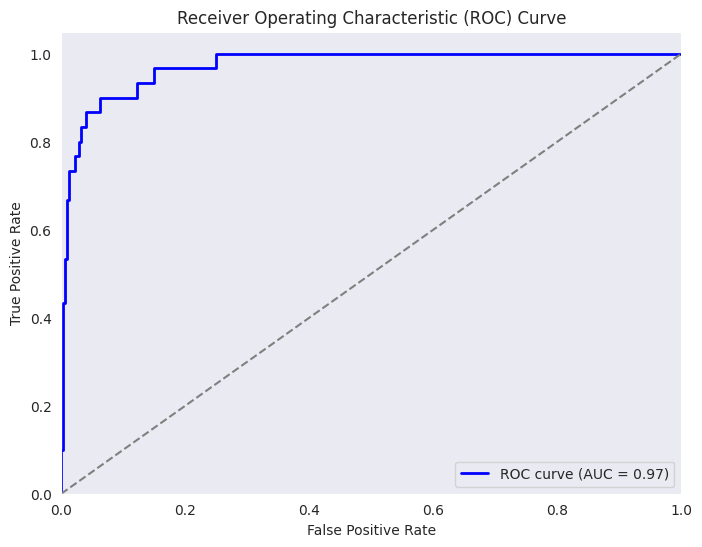

In [ ]:
y_probs = adaboost.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)
auc_roc = roc_auc_score(Y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Create Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(X_train, Y_train)

# Predict on the test set
y_pred = random_forest.predict(X_test)

In [ ]:

accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(Y_test, y_pred)
print("Precision:", precision)
recall = recall_score(Y_test, y_pred)
print("Recall:", recall)
f1 = f1_score(Y_test, y_pred)
print("F1 Score:", f1)
auc_roc_score = roc_auc_score(Y_test, y_pred)
print("AUC-ROC Score:", auc_roc_score)


Accuracy: 0.9544159544159544
Precision: 0.7692307692307693
Recall: 0.6666666666666666
F1 Score: 0.7142857142857142
AUC-ROC Score: 0.8239875389408099


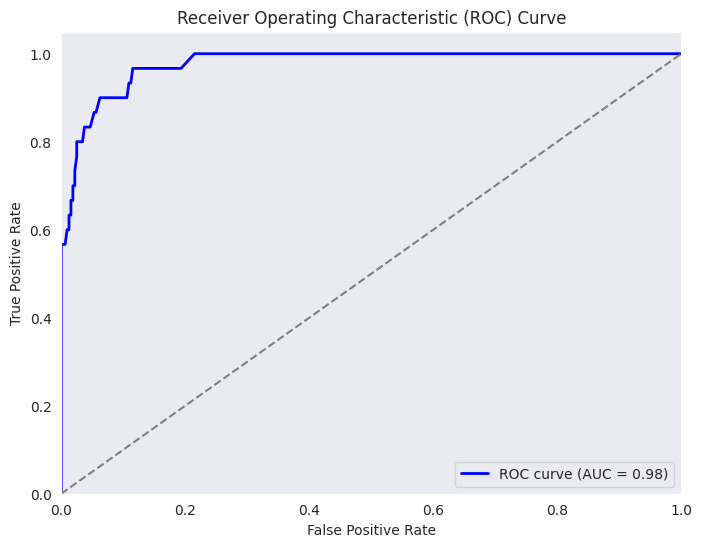

In [ ]:
y_probs = random_forest.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)
auc_roc = roc_auc_score(Y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Create Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)
params = decision_tree.get_params()

# Print the parameters
for param, value in params.items():
    print(param, ':', value)

# Train the model
decision_tree.fit(X_train, Y_train)

# Predict on the test set
y_pred = decision_tree.predict(X_test)


ccp_alpha : 0.0
class_weight : None
criterion : gini
max_depth : None
max_features : None
max_leaf_nodes : None
min_impurity_decrease : 0.0
min_samples_leaf : 1
min_samples_split : 2
min_weight_fraction_leaf : 0.0
random_state : 42
splitter : best


In [ ]:
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(Y_test, y_pred)
print("Precision:", precision)
recall = recall_score(Y_test, y_pred)
print("Recall:", recall)
f1 = f1_score(Y_test, y_pred)
print("F1 Score:", f1)



from sklearn.datasets import make_classification

auc_roc_score = roc_auc_score(Y_test, y_pred)

print("AUC-ROC Score:", auc_roc_score)


Accuracy: 0.9458689458689459
Precision: 0.6571428571428571
Recall: 0.7666666666666667
F1 Score: 0.7076923076923077
AUC-ROC Score: 0.8646417445482866


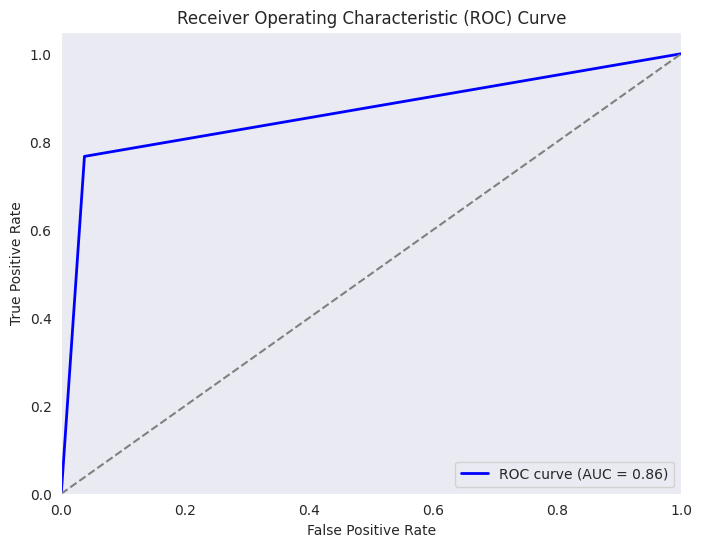

In [ ]:
y_probs = decision_tree.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)
auc_roc = roc_auc_score(Y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#GridSearchCV on Decision  Tree Classifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, roc_auc_score, roc_curve



dt_classifier = DecisionTreeClassifier(random_state=42)


param_grid = {
    'class_weight': [None, 'balanced'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


scorer = make_scorer(f1_score, average='weighted')

grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, scoring=scorer, cv=5)
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Parameters:", best_params)
print("Best Score (F1):", best_score)

best_dt_classifier = DecisionTreeClassifier(**best_params, random_state=42)
best_dt_classifier.fit(X_train, Y_train)

y_pred = best_dt_classifier.predict(X_test)


precision=precision_score(Y_test, y_pred, average='weighted')
recall=recall_score(Y_test, y_pred, average='weighted')
f1 = f1_score(Y_test, y_pred, average='weighted')

auc_roc=roc_auc_score(Y_test, y_pred, average='weighted')

print("Test Precision Score:", precision)


print("Test Recall Score:", recall)

print("Test F1 Score:", f1)

print("AUC-ROC Score:", auc_roc)
#Accuracy: 0.9487179487179487 [This is the accuracy score I have got for the model sorry I forgot to print it during code my walkthrough]

Parameters: {'class_weight': None, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Score (F1): 0.9584744829473957
Test Precision Score: 0.9540903540903539
Test Recall Score: 0.9487179487179487
Test F1 Score: 0.9508070545806394
AUC-ROC Score: 0.8813084112149533


In [ ]:
auc_roc_score = roc_auc_score(Y_test, y_pred)
print("AUC-ROC Score:", auc_roc_score)

AUC-ROC Score: 0.8813084112149533


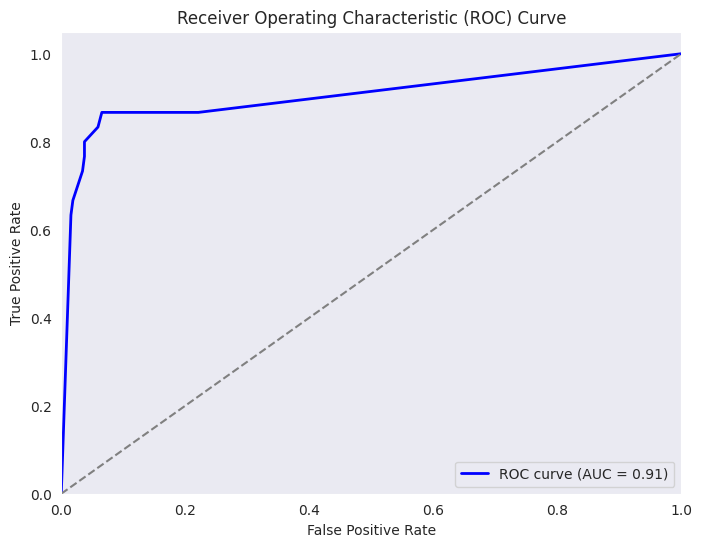

In [ ]:
y_probs = best_dt_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)
auc_roc = roc_auc_score(Y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Two of the best results obtained were:

# DecisionTree(BestParams):
# Parameters: {'class_weight': None, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
# Accuracy: 0.9487179487179487 [This is the accuracy score I have got for the model sorry I forgot to print it during code my walkthrough]
# Best Score (F1): 0.9584744829473957
# Test Precision Score: 0.9540903540903539
# Test Recall Score: 0.9487179487179487
# Test F1 Score: 0.9508070545806394
# AUC-ROC Score: 0.8813084112149533


#KNN(best_params)
# Best Parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
# Accuracy: 0.9287749287749287 [This is the accuracy score I have got for the model sorry I forgot to print it during code my walkthrough]
# Best Score (F1): 0.9645212189009325
# Test Precision Score: 0.9392943239097085
# Test Recall Score: 0.9287749287749287
# Test F1 Score: 0.9329137027467956
# AUC-ROC Score: 0.8401869158878504




